# <center> Topic 1. Exploratory data analysis with Pandas

<img align="center" src="https://habrastorage.org/files/10c/15f/f3d/10c15ff3dcb14abdbabdac53fed6d825.jpg"  width=50% />

### Article outline
1. [Demonstration of main Pandas methods](#1.-Demonstration-of-main-Pandas-methods)
2. [First attempt at predicting telecom churn](#2.-First-attempt-at-predicting-telecom-churn)
3. [Demo assignment](#3.-Demo-assignment)
4. [Useful resources](#4-Useful-resources)

## Demonstration of main Pandas methods
Well... There are dozens of cool tutorials on Pandas and visual data analysis. If you are already familiar with these topics, you can wait for the 3rd article in the series, where we get into machine learning.  


In [47]:
import numpy as np
import pandas as pd
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

# some imports to set up plotting 
import matplotlib.pyplot as plt 
import seaborn as sns


We’ll demonstrate the main methods in action by analyzing a [dataset](https://bigml.com/user/francisco/gallery/dataset/5163ad540c0b5e5b22000383) on the churn rate of telecom operator clients. Let’s read the data (using `read_csv`), and take a look at the first 5 lines using the `head` method:


In [48]:
data = pd.read_csv(r'F:\Programacion\1.BOOTCAMP\data\general_dfs\telecom_churn.csv')
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


<details>
<summary>About printing DataFrames in Jupyter notebooks</summary>
<p>
In Jupyter notebooks, Pandas DataFrames are printed as these pretty tables seen above while `print(df.head())` is less nicely formatted.
By default, Pandas displays 20 columns and 60 rows, so, if your DataFrame is bigger, use the `set_option` function as shown in the example below:

```python
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
```
</p>
</details>

Recall that each row corresponds to one client, an **instance**, and columns are **features** of this instance.

Let’s have a look at data dimensionality, feature names, and feature types.

In [49]:
data.shape

(3333, 20)

Now let’s try printing out column names using `columns`:

In [50]:
data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

We can use the `info()` method to output some general information about the dataframe: 

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


We can **change the column type** with the `astype` method. Let’s apply this method to the `Churn` feature to convert it into `int64`:


In [52]:
data['Churn'] = data['Churn'].astype('int64')
data['Churn'].dtype

dtype('int64')


The `describe` method shows basic statistical characteristics of each numerical feature (`int64` and `float64` types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

In [53]:
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest in the `include` parameter ((type `object`) and boolean (type `bool`))

In [54]:
data.describe(include = ['O'])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


Let's count the number of users that churned

In [55]:
len(data.index)

3333

To calculate fractions, pass `normalize=True` to the `value_counts` function.

In [56]:
data['Churn'].value_counts(normalize = True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64


### Sorting

A DataFrame can be sorted by the value of one of the variables (i.e columns). For example, we can sort by *Total day charge* (use `ascending=False` to sort in descending order):


In [57]:
data['Churn'].sort_values(ascending = False)

1204    1
2115    1
340     1
2119    1
1263    1
       ..
2122    0
2121    0
2120    0
2117    0
0       0
Name: Churn, Length: 3333, dtype: int64

We can also sort by multiple column. Let'sorder by 'Churn' and 'ToTotal day charge'

In [58]:
data.sort_values(by= ['Churn', 'Total day charge'], ascending= False)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,OR,98,415,Yes,No,0,12.5,67,2.13,256.6,90,21.81,169.4,88,7.62,7.7,9,2.08,1,0
1986,WI,70,415,No,No,0,7.9,100,1.34,136.4,83,11.59,156.6,89,7.05,12.1,1,3.27,0,0
2753,OH,134,415,No,No,0,7.8,86,1.33,171.4,100,14.57,186.5,80,8.39,12.9,2,3.48,2,0
2736,OK,127,510,No,Yes,27,2.6,113,0.44,254.0,102,21.59,242.7,156,10.92,9.2,5,2.48,3,0



### Indexing and retrieving data

A DataFrame can be indexed in a few different ways. 

To get a single column, you can use a `DataFrame['Name']` construction.
Let's use this to answer a question about that column alone: **what is the proportion of churned users in our dataframe?**



In [59]:
data['Churn']

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3333, dtype: int64




**Boolean indexing** with one column is also very convenient. The syntax is `df[P(df['Name'])]`, where `P` is some logical condition that is checked for each element of the `Name` column. The result of such indexing is the DataFrame consisting only of rows that satisfy the `P` condition on the `Name` column. 

Let’s use it to answer the question:

**What are average values of numerical features for churned users?**


In [60]:
data.loc[data['Churn'] == 1]['Total night charge'].mean()

9.235527950310564

**How much time (on average) do churned users spend on the phone during daytime?**

In [61]:
data.loc[data['Churn'] == 1]['Total day minutes'].mean()

206.91407867494814


**What is the maximum length of international calls among loyal users (`Churn == 0`) who do not have an international plan?**



In [62]:
data['Churn'] = data['Churn'].replace({0: 'Loyal', 1: 'Disloyal'})

In [63]:
data.groupby(['Churn', 'International plan'])['Total intl minutes'].max()

Churn     International plan
Disloyal  No                    18.3
          Yes                   20.0
Loyal     No                    18.9
          Yes                   13.0
Name: Total intl minutes, dtype: float64


DataFrames can be indexed by column name (label) or row name (index) or by the serial number of a row. The `loc` method is used for **indexing by name**, while `iloc()` is used for **indexing by number**.

Obtain the values of the rows with index from 0 to 5 (inclusive) and columns labeled from State to Area code (inclusive)"*. 


In [64]:
data.iloc[1:6, 0:3]

,State,Account length,Area code
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


Obtain the values of the first five rows in the first three columns"* (as in a typical Python slice: the maximal value is not included).

In [65]:
data.iloc[0:6, 0:3]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


Obtain the last line of the data frame:

In [66]:
data.iloc[-1]

State                        TN
Account length               74
Area code                   415
International plan           No
Voice mail plan             Yes
Number vmail messages        25
Total day minutes         234.4
Total day calls             113
Total day charge          39.85
Total eve minutes         265.9
Total eve calls              82
Total eve charge           22.6
Total night minutes       241.4
Total night calls            77
Total night charge        10.86
Total intl minutes         13.7
Total intl calls              4
Total intl charge           3.7
Customer service calls        0
Churn                     Loyal
Name: 3332, dtype: object


### Applying Functions to Cells, Columns and Rows

**To apply functions to each column, use `apply()`:**. Let's obtain the max of each column.


In [67]:
wyoming = lambda df: df['State'].loc[df['State'].startswith('W')]

The `apply` method can also be used to apply a function to each row. To do this, specify `axis=1`. Lambda functions are very convenient in such scenarios. Select all states starting with W using a lambda function.

In [68]:
data.apply (wyoming)

KeyError: ('State', 'occurred at index State')

The `map` method can be used to **replace values in a column** by passing a dictionary of the form `{old_value: new_value}`. Use a dictionary to convert 'No' to False and 'Yes' to True in the International Plan column.

In [69]:
data ['International plan'].head(6)

0     No
1     No
2     No
3    Yes
4    Yes
5    Yes
Name: International plan, dtype: object

In [70]:
data ['International plan'] = data ['International plan'].map({'No': False, 'Yes': True})
data ['International plan'].head(6)

0    False
1    False
2    False
3     True
4     True
5     True
Name: International plan, dtype: bool

The same thing can be done with the `replace` method:

In [71]:
data ['International plan'] = data ['International plan'].replace({False: 'Nope', True: 'Hell yes!'})
data ['International plan'].head(6)

0         Nope
1         Nope
2         Nope
3    Hell yes!
4    Hell yes!
5    Hell yes!
Name: International plan, dtype: object

In [72]:
data ['International plan'] = data ['International plan'].map({'Nope': False, 'Hell yes!': True})
data ['International plan'].head(6)

0    False
1    False
2    False
3     True
4     True
5     True
Name: International plan, dtype: bool


### Grouping

In general, grouping data in Pandas works as follows:



```python
df.groupby(by=grouping_columns)[columns_to_show].function()
```


1. First, the `groupby` method divides the `grouping_columns` by their values. They become a new index in the resulting dataframe.
2. Then, columns of interest are selected (`columns_to_show`). If `columns_to_show` is not included, all non groupby clauses will be included.
3. Finally, one or several functions are applied to the obtained groups per selected columns.

Group the data according to the values of the `Churn` variable and display statistics of three columns in each group:

In [73]:
data.groupby('Churn')[['Total day minutes', 'Total eve minutes', 'Total night minutes']].mean()

,Total day minutes,Total eve minutes,Total night minutes
Churn,,,
Disloyal,206.914079,212.410145,205.231677
Loyal,175.175754,199.043298,200.133193


Let’s do the same thing, but slightly differently by passing a list of functions to `agg()`:

In [74]:
data.groupby('Churn')[['Total day minutes', 'Total eve minutes', 'Total night minutes']].agg(['min','mean', 'max'])

Total day minutes                    Total eve minutes              \
                       min        mean    max               min        mean   
Churn                                                                         
Disloyal               0.0  206.914079  350.8              70.9  212.410145   
Loyal                  0.0  175.175754  315.6               0.0  199.043298   

                Total night minutes                     
            max                 min        mean    max  
Churn                                                   
Disloyal  363.7                47.4  205.231677  354.9  
Loyal     361.8                23.2  200.133193  395.0


### Summary tables

Suppose we want to see how the observations in our sample are distributed in the context of two variables - `Churn` and `International plan`. 
To do so, we can build a **contingency table** using the `crosstab` method. Do it also for `Churn` and `Voice mail plan`



In [75]:
pd.crosstab(data['Churn'] ,data['International plan'])

International plan,False,True
Churn,,
Disloyal,346,137
Loyal,2664,186


In [76]:
pd.crosstab(data['Churn'] ,data['Voice mail plan'])

Voice mail plan,No,Yes
Churn,,
Disloyal,403,80
Loyal,2008,842


In [77]:
data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

We can see that most of the users are loyal and do not use additional services (International Plan/Voice mail).

This will resemble **pivot tables** to those familiar with Excel. And, of course, pivot tables are implemented in Pandas: the `pivot_table` method takes the following parameters:

* `values` – a list of variables to calculate statistics for,
* `index` – a list of variables to group data by,
* `aggfunc` – what statistics we need to calculate for groups, ex. sum, mean, maximum, minimum or something else.

Let’s take a look at the average number of day, evening, and night calls by area code:

In [78]:
pd.pivot_table(data=data, values= ['Total day calls', 'Total eve calls', 'Total night calls'], index= 'International plan', aggfunc= ['min', 'mean', 'max'])

min                                    \
                   Total day calls Total eve calls Total night calls   
International plan                                                     
False                            0               0                33   
True                            42              50                48   

                              mean                                    \
                   Total day calls Total eve calls Total night calls   
International plan                                                     
False                   100.410963      100.074419        100.027907   
True                    100.665635      100.486068        100.851393   

                               max                                    
                   Total day calls Total eve calls Total night calls  
International plan                                                    
False                          165             170               175  
True                           146             159               154


### DataFrame transformations

Like many other things in Pandas, adding columns to a DataFrame is doable in many ways.

For example, if we want to calculate the total number of calls for all users, let’s create the `total_calls` Series and paste it into the DataFrame:



In [79]:
data['Total day calls'].dtype , data['Total eve calls'].dtype, data['Total night calls'].dtype

(dtype('int64'), dtype('int64'), dtype('int64'))

In [80]:
data ['Total calls'] = data['Total day calls'] + data['Total eve calls'] + data['Total night calls']
data ['Total calls'].head()

0    300
1    329
2    328
3    248
4    356
Name: Total calls, dtype: int64

To delete columns or rows, use the `drop` method, passing the required indexes and the `axis` parameter (`1` if you delete columns, and nothing or `0` if you delete rows). The `inplace` argument tells whether to change the original DataFrame. With `inplace=False`, the `drop` method doesn't change the existing DataFrame and returns a new one with dropped rows or columns. With `inplace=True`, it alters the DataFrame.
Delete `Total calls` inplace

In [81]:
# data.drop('Total calls', axis= 1, inplace= True)

## 2. First attempt at predicting telecom churn


Let's see how churn rate is related to the *International plan* feature. We’ll do this using a `crosstab` contingency table and also through visual analysis with `Seaborn`. Let's creat a crosstab table with `Churn` and `International plan`


In [82]:
cross_1 = pd.crosstab(data['International plan'] ,data['Churn'])
cross_1

Churn,Disloyal,Loyal
International plan,,
False,346,2664
True,137,186


Create a count plot with `International plan` as x serie and `Churn` as hue

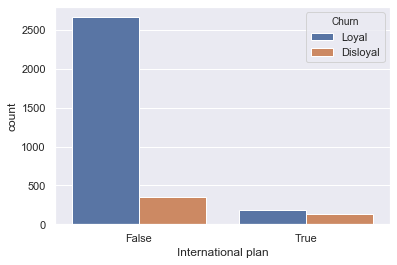

In [83]:
sns.set(style="darkgrid")
ax = sns.countplot(x='International plan', hue='Churn', data=data)


We see that, with *International Plan*, the churn rate is much higher, which is an interesting observation! Perhaps large and poorly controlled expenses with international calls are very conflict-prone and lead to dissatisfaction among the telecom operator's customers.

Next, let’s look at another important feature – *Customer service calls*. Let’s also make a summary table and a picture.

In [84]:
cross_2 = pd.crosstab(data['Customer service calls'] ,data['International plan'])
cross_2

International plan,False,True
Customer service calls,,
0,614,83
1,1069,112
2,697,62
3,391,38
4,145,21
5,60,6
6,22,0
7,9,0
8,2,0


Create a count plot with `Customer service calls` as x serie and `Churn` as hue

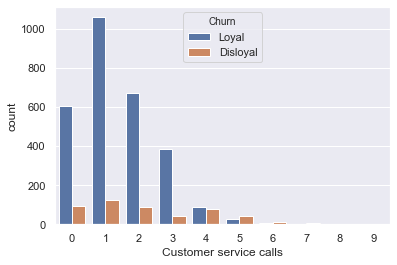

In [85]:
sns.set(style="darkgrid")
ax = sns.countplot(x='Customer service calls', hue='Churn', data=data)

Although it's not so obvious from the summary table, it's easy to see from the above plot that the churn rate increases sharply from 4 customer service calls and above.

Now let's add a binary feature to our DataFrame – `Customer service calls > 3`. And once again, let's see how it relates to churn. 

In [86]:
condition_1 = data.loc[data['Customer service calls'] > 3]


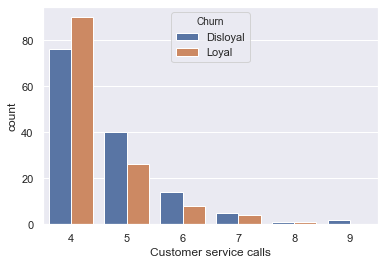

In [87]:
sns.set(style="darkgrid")
ax = sns.countplot('Customer service calls', hue='Churn', data=condition_1)


Let’s construct another contingency table that relates *Churn* with both *International plan* and freshly created *Many_service_calls*.



In [97]:
cross_3 = pd.crosstab(data['Total calls'],[data['Churn'], data['International plan']])
cross_3

Churn              Disloyal       Loyal      
International plan    False True  False True 
Total calls                                  
188                       0     0     1     0
203                       0     0     2     0
204                       1     0     1     0
206                       0     0     1     0
207                       0     0     2     0
...                     ...   ...   ...   ...
394                       0     0     1     0
396                       1     0     0     0
397                       0     0     2     0
407                       1     0     0     0
410                       0     0     1     0

[190 rows x 4 columns]

Therefore, predicting that a customer is not loyal (*Churn*=1) in the case when the number of calls to the service center is greater than 3 and the *International Plan* is added (and predicting *Churn*=0 otherwise), we might expect an accuracy of 85.8% (we are mistaken only 464 + 9 times). This number, 85.8%, that we got through this very simple reasoning serves as a good starting point (*baseline*) for the further machine learning models that we will build. 

As we move on in this course, recall that, before the advent of machine learning, the data analysis process looked something like this. Let's recap what we've covered:
    
- The share of loyal clients in the sample is 85.5%. The most naive model that always predicts a "loyal customer" on such data will guess right in about 85.5% of all cases. That is, the proportion of correct answers (*accuracy*) of subsequent models should be no less than this number, and will hopefully be significantly higher;
- With the help of a simple forecast that can be expressed by the following formula: "International plan = True & Customer Service calls > 3 => Churn = 1, else Churn = 0", we can expect a guessing rate of 85.8%, which is just above 85.5%. Subsequently, we'll talk about decision trees and figure out how to find such rules **automatically** based only on the input data;
- We got these two baselines without applying machine learning, and they’ll serve as the starting point for our subsequent models. If it turns out that with enormous effort, we increase the share of correct answers by 0.5% per se, then possibly we are doing something wrong, and it suffices to confine ourselves to a simple model with two conditions;
- Before training complex models, it is recommended to manipulate the data a bit, make some plots, and check simple assumptions. Moreover, in business applications of machine learning, they usually start with simple solutions and then experiment with more complex ones.


## Useful resources

* The same notebook as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas)
* ["Merging DataFrames with pandas"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/merging_dataframes_tutorial_max_palko.ipynb) - a tutorial by Max Plako within mlcourse.ai (full list of tutorials is [here](https://mlcourse.ai/tutorials))
* ["Handle different dataset with dask and trying a little dask ML"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/dask_objects_and_little_dask_ml_tutorial_iknyazeva.ipynb) - a tutorial by Irina Knyazeva within mlcourse.ai
* Main course [site](https://mlcourse.ai), [course repo](https://github.com/Yorko/mlcourse.ai), and YouTube [channel](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX)
* Official Pandas [documentation](http://pandas.pydata.org/pandas-docs/stable/index.html)
* Course materials as a [Kaggle Dataset](https://www.kaggle.com/kashnitsky/mlcourse)
* Medium ["story"](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-1-exploratory-data-analysis-with-pandas-de57880f1a68) based on this notebook
* If you read Russian: an [article](https://habrahabr.ru/company/ods/blog/322626/) on Habr.com with ~ the same material. And a [lecture](https://youtu.be/dEFxoyJhm3Y) on YouTube
* [10 minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Pandas cheatsheet PDF](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
* GitHub repos: [Pandas exercises](https://github.com/guipsamora/pandas_exercises/) and ["Effective Pandas"](https://github.com/TomAugspurger/effective-pandas)
* [scipy-lectures.org](http://www.scipy-lectures.org/index.html) — tutorials on pandas, numpy, matplotlib and scikit-learn



Author: [Yury Kashnitskiy](https://yorko.github.io). Translated and edited by [Christina Butsko](https://www.linkedin.com/in/christinabutsko/), [Yuanyuan Pao](https://www.linkedin.com/in/yuanyuanpao/), [Anastasia Manokhina](https://www.linkedin.com/in/anastasiamanokhina), Sergey Isaev and [Artem Trunov](https://www.linkedin.com/in/datamove/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.